핸즈온 9장 <비지도 학습> p.328 ~ 347

---

#9.2 가우시안 혼합
- #### 9.2.1 가우시안 혼합을 사용한 이상치 탐지
- #### 9.2.2 클러스터 개수 선택하기
- #### 9.2.3 베이즈 가우시안 혼합 모델
- #### 9.2.4 이상치, 특이치 탐지를 위한 다른 알고리즘

---

# 9.2 가우시안 혼합 (Gaussian Mixture)

[정의]
- 가우시안 혼합 모델(GMM) : 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델
- 기댓값-최대화(EM) 알고리즘 : 각 클러스터의 상대적 가중치와 파라미터(중심, 크기, 모양, 방향)를 추정하는 방법
   - 1. 클러스터 파라미터를 랜덤하게 초기화
   - 2. 기댓값 단계: 샘플을 클러스터에 할당, 각 클러스터에 속할 확률을 예측
   - 3. 최대화 단계: 클러스터를 업데이트. 클러스터에 속할 추정 확률로 샘플에 가중치가 적용됨.
- 생성 모델 : 새로운 샘플을 만들 수 있는 모델



[특징]
- k-평균 알고리즘은 하드 클러스터 할당을 사용하는 반면 기댓값-최대화(EM) 알고리즘은 소프트 클러스터 할당을 사용함.
- 가우시안 혼합 모델은 생성 모델
- score_samples() 메서드는 확률 밀도 함수의 로그를 예측. 따라서 밀도값은 0~1값이 아니라 어떤 양숫값.
- 데이터셋 X가 생성되는 과정을 표현한 그래프 모형. 확률 변수 사이의 조건부 의존성의 구조를 나타냄.


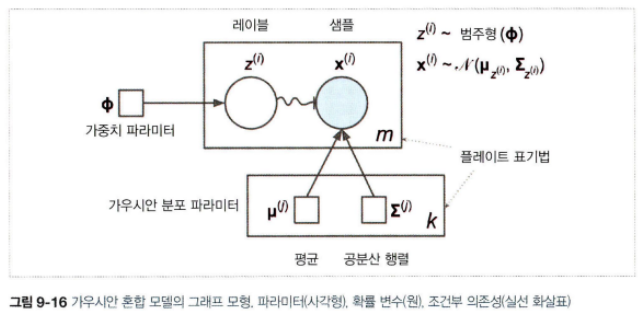

- 사이킷런의 covariance_type 매개변수 : (특성, 클러스터가 많거나 샘플이 적어서 EM이 최적의 솔루션으로 수렴하기 어려운 경우) 클러스터의 모양과 방향의 범위를 제한하는 방법 중 하나. (m:샘플 개수, n:차원 개수, k:클러스터 개수)
   - 'full': default. 클러스터 모양에 제약이 없음. O(kmn^2+kn^3)
   - 'spherical': 모든 클러스터가 원형. O(kmn)
   - 'diag': 타원형인 클러스터의 축은 좌표 축과 나란함.O(kmn)
   - 'tied': 모든 클러스터가 동일한 타원 형태. O(kmn^2+kn^3)

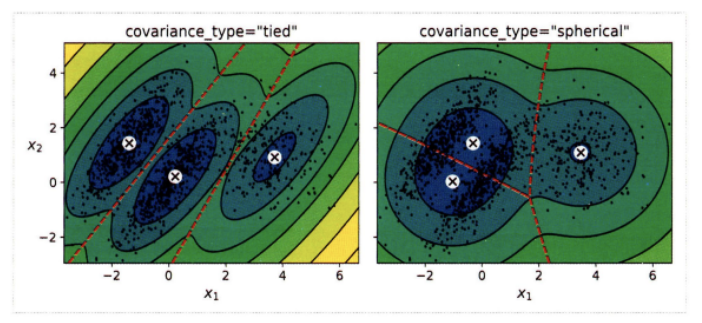

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise= 0.05)

In [3]:
# 사이킷런의 GaussianMixture 클래스
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [4]:
# 추정된 가중치 벡터 확인
gm.weights_

array([0.59829697, 0.2012331 , 0.20046993])

In [5]:
# 추정된 중심 좌표 확인
gm.means_

array([[ 0.5016864 ,  0.24516584],
       [-0.75006941,  0.55087665],
       [ 1.75668208, -0.05212752]])

In [6]:
# 추정된 방향(공분산 행렬) 확인
gm.covariances_

array([[[ 0.17217993, -0.10532067],
        [-0.10532067,  0.29075909]],

       [[ 0.04975957,  0.05944525],
        [ 0.05944525,  0.08698115]],

       [[ 0.04910961,  0.0582864 ],
        [ 0.0582864 ,  0.08693292]]])

In [7]:
# 알고리즘이 수렴했음을 확인
gm.converged_

True

In [8]:
# EM 알고리즘의 반복횟수 확인
gm.n_iter_

18

In [9]:
# 새로운 샘플을 가장 비슷한 클러스터에 할당 (하드 군집)
gm.predict(X)

array([1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2,
       0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0,
       2, 2, 1, 1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2,
       1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1,
       0, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 2,

In [10]:
# 샘플이 특정 클러스터에 속할 확률을 예측 (소프트 군집)
gm.predict_proba(X)

array([[4.61045446e-002, 9.53895455e-001, 5.50359709e-186],
       [6.18177013e-002, 1.18674686e-241, 9.38182299e-001],
       [7.05864921e-003, 3.36002519e-218, 9.92941351e-001],
       ...,
       [9.99999999e-001, 9.49239111e-010, 1.89534077e-114],
       [1.10435211e-002, 5.96239236e-208, 9.88956479e-001],
       [9.99999996e-001, 2.50462101e-127, 3.88172234e-009]])

In [11]:
# 새로운 샘플을 생성
X_new, y_new = gm.sample(6)
print(X_new)
print(y_new)

[[ 0.15964126  0.48127454]
 [ 0.77934354 -0.69070895]
 [ 0.29745645  0.37412552]
 [ 0.30312251  0.33130884]
 [-0.50041623  1.10090144]
 [ 1.85064609  0.16696126]]
[0 0 0 0 1 2]


In [12]:
# 샘플의 확률밀도함수(pdf)의 로그를 예측하여 반환
gm.score_samples(X)

array([-5.91758979e-01, -3.54407131e+00, -5.06450073e-01, -1.60916347e+00,
       -1.78629472e+00, -1.45591828e+00, -1.28739644e+00, -1.77610618e+00,
       -1.43284707e+00, -1.46209022e+00, -1.43651124e+00,  3.39315028e-03,
       -1.95518271e+00, -1.52896312e+00, -1.70416610e+00, -2.34206101e+00,
       -1.32239536e+00, -1.60656424e+00, -6.82905859e-01, -1.78422145e+00,
       -6.84452895e-01, -1.53215048e+00, -1.56318524e+00, -3.60745636e-01,
       -9.67670152e-01, -1.68149413e+00, -1.19972080e+00, -1.38941931e+00,
       -1.67202195e+00, -4.03452015e-01, -1.62694207e+00, -8.42486182e-01,
       -2.21503785e+00, -1.54223547e-01, -9.07346537e-01, -1.59918233e+00,
       -1.92223923e+00, -1.67365907e+00, -4.68873307e-01, -1.68274934e+00,
       -1.56903177e+00, -2.17392617e+00, -6.95060465e-01, -1.73347462e+00,
       -1.99776250e+00, -1.61003090e+00, -1.70580186e+00, -1.52101632e+00,
       -1.80116687e+00, -1.57896045e+00, -1.61930689e+00, -1.59623950e+00,
       -1.72687112e+00, -

### 9.2.1 가우시안 혼합을 사용한 이상치 탐지
[정의]
- 이상치 탐지: 보통과 많이 다른 샘플을 감지하는 작업
- 특이치 탐지: 이상치로 오염되지 않은 '깨끗한 데이터셋'에서 훈련

[특징]
- 이상치 <-> 정상치
- 가우시안 혼합 모델이 이상치를 탐지하는 방법: 밀도 임곗값을 설정. 밀도가 이 임곗값보다 낮은 지역에 있는 모든 샘플이 이상치에 해당.
   - 거짓 양성(양성인데 음성으로 잘못 표시된 것)이 많으면 -> 임곗값 낮추기
   - 거짓 음성(음성인데 양성으로 잘못 표시된 것)이 많으면 -> 임곗값 높이기


In [13]:
# 네번째 백분위수를 밀도 임곗값으로 사용하여 이상치를 구분
import numpy as np

densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalities = X[densities < density_threshold]

### 9.2.2 클러스터 개수 선택하기

클러스터가 타원형이거나 크기가 다를 때 안정적이지 못하기 때문에 이론적 정보 기준인 BIC, AIC를 최소화하는 모델을 찾음.


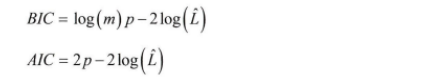

[정의]
- 확률 <-> 가능도
- 최대 가능도 추정(MLE), 최대 사후 확률(MAP)

In [15]:
# 추정된 파라미터와 주어진 샘플로 BIC와 AIC값 계산
print(gm.bic(X), gm.aic(X))

2777.1417465148274 2693.709906772131


### 9.2.3 베이즈 가우시안 혼합 모델

최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만드는 방법

[정의]
- 베타 분포
- 변분 추론, 변분 파라미터
- 블랙박스 확률적 변분추론(BBSVI)



In [18]:
# 클러스터 개수를 10으로 설정했을 때 베이즈 가우시안 모델 결과
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.12, 0.16, 0.12, 0.11, 0.12, 0.15, 0.11, 0.  , 0.1 , 0.  ])

### 9.2.4 이상치와 특이치 탐지를 위한 다른 알고리즘
- PCA
- Fast-MCD
- 아이솔레이션 포레스트 (Isolation Forest)
- LOF
- one-class SVM